# Analyzing Time Series Data and perform regressional analysis with Socrata and Python

In [1]:
import os
os.getcwd()


'c:\\Users\\jessi\\OneDrive\\Desktop\\2024\\te440project'

# Milestone 2

## Loading datasets into our notebook

We'll start by loading a city of Chicago permits dataset into a Pandas DataFrame. We'll use the open source sodapy Python Socrata module to do this.

In [3]:
import pandas as pd
from sodapy import Socrata

# load Chicago permits data
chicago_permits_df = pd.read_csv(r'Building_Permits.csv')

C:\Users\jessi\AppData\Local\Temp\ipykernel_10752\2591492244.py:5: DtypeWarning: Columns (0,1,12,34,39,44,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_permits_df = pd.read_csv(r'Building_Permits.csv')


In the next few cells we'll do some exploration of our datasets using the `len`, `head`, and `value_counts` functions. We'll start by getting a sense of how many rows are in each of our datasets with the `len` function.

Now let's see have a peek at the first 10 rows in each of those dataset using the `head` method. You can optionally pass a parameter for the number of rows you want to print if 5 isn't enough.

In [4]:
print(len(chicago_permits_df))
chicago_permits_df.head(10)

787617


,ID,PERMIT#,PERMIT_STATUS,PERMIT_MILESTONE,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,...,REPORTED_COST,PIN_LIST,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,2702289,100620286,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,10/23/2015,10/23/2015,0.0,9586.0,...,35000.0,2607103071,NaN,NaN,NaN,1.195183e+06,1.841903e+06,NaN,NaN,NaN
1,2706282,100622550,NaN,NaN,PERMIT - ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,11/05/2015,11/05/2015,0.0,150.0,...,666058.0,1709326001,28.0,2801.0,42.0,NaN,NaN,NaN,NaN,NaN
2,2713781,100626588,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,12/07/2015,12/07/2015,0.0,2231.0,...,4000.0,1431106016,22.0,221600.0,32.0,1.160967e+06,1.915314e+06,NaN,NaN,NaN
3,2716840,100628184,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,12/17/2015,12/17/2015,0.0,6437.0,...,12000.0,2023102007,42.0,420800.0,20.0,NaN,NaN,NaN,NaN,NaN
4,2708080,100623607,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,11/12/2015,11/17/2015,5.0,2500.0,...,13000.0,1728236003,35.0,350400.0,3.0,NaN,NaN,NaN,NaN,NaN
5,2741899,100641877,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,03/28/2016,04/01/2016,4.0,6821.0,...,49912.0,2024314004,43.0,430200.0,5.0,1.190093e+06,1.860027e+06,NaN,NaN,NaN
6,2759311,100652453,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,05/27/2016,05/31/2016,4.0,328.0,...,4440.0,2521204019,49.0,491300.0,34.0,1.175968e+06,1.830694e+06,NaN,NaN,NaN
7,2982615,100787475,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,10/10/2018,10/10/2018,0.0,6700.0,...,0.0,NaN,42.0,421200.0,20.0,NaN,NaN,NaN,NaN,NaN
8,1668901,100106114,NaN,NaN,PERMIT - SIGNS,SIGN PERMIT,04/06/2006,04/06/2006,0.0,6359.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3170997,100910640,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,02/26/2021,03/11/2021,13.0,1712.0,...,0.0,NaN,25.0,250300.0,37.0,1.139761e+06,1.910924e+06,NaN,NaN,NaN


Printing our dataframes like this gives us a sense of what columns exist, and quick sense of some of the values in the dataset. But there's an even better way to detrmine the top values for a particular column -- the `value_counts` method.

In [5]:
chicago_permits_df["APPLICATION_START_DATE"].value_counts(dropna=False).head(10)

APPLICATION_START_DATE
10/16/2007    366
NaN           348
05/25/2016    346
08/14/2019    341
03/07/2017    328
03/30/2011    321
03/13/2006    321
04/23/2012    321
09/22/2014    316
07/19/2006    315
Name: count, dtype: int64

## Select a subset of a DataFrame & Deal with missing values

In [6]:
chicago_permits_df.shape

(787617, 115)

In [7]:
chicago_permits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787617 entries, 0 to 787616
Columns: 115 entries, ID to LOCATION
dtypes: float64(27), object(88)
memory usage: 691.0+ MB


In [8]:
print(chicago_permits_df.isnull().sum())

ID                       0
PERMIT#                  0
PERMIT_STATUS       316097
PERMIT_MILESTONE    316097
PERMIT_TYPE              0
                     ...  
XCOORDINATE           1104
YCOORDINATE           1104
LATITUDE             12316
LONGITUDE            12316
LOCATION             12316
Length: 115, dtype: int64


There are too many columns to analysize and we probably do not care the information in all the columns. So let's only select part of the dataframe we care about. Please make your own decision of columns selection based on what you would like to observie.

In [11]:
chicago_permits_df.columns

Index(['ID', 'PERMIT#', 'PERMIT_STATUS', 'PERMIT_MILESTONE', 'PERMIT_TYPE',
       'REVIEW_TYPE', 'APPLICATION_START_DATE', 'ISSUE_DATE',
       'PROCESSING_TIME', 'STREET_NUMBER',
       ...
       'REPORTED_COST', 'PIN_LIST', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD',
       'XCOORDINATE', 'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object', length=115)

In [14]:
chicago_permits_df_sub = chicago_permits_df[['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE','STREET_DIRECTION','COMMUNITY_AREA','LATITUDE', 'LONGITUDE', 'LOCATION']]

In [15]:
chicago_permits_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787617 entries, 0 to 787616
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      787617 non-null  object 
 1   PERMIT#                 787617 non-null  object 
 2   PERMIT_TYPE             787617 non-null  object 
 3   REVIEW_TYPE             787609 non-null  object 
 4   APPLICATION_START_DATE  787269 non-null  object 
 5   STREET_DIRECTION        787561 non-null  object 
 6   COMMUNITY_AREA          712955 non-null  float64
 7   LATITUDE                775301 non-null  float64
 8   LONGITUDE               775301 non-null  float64
 9   LOCATION                775301 non-null  object 
dtypes: float64(3), object(7)
memory usage: 60.1+ MB


The value counts make it clear that a lot of the values in the "application_start_date" column are missing or null. There a variety of ways you can handle missing data, but removing incomplete rows is the simplest. In the next cell, we'll remove rows with null dates. There are also a lot of columns in the permits dataset that we won't use in this analysis. So we'll also filter down our dataset to just the columns we're interested in to reduce the amount of extraneous information.

In [16]:
chicago_permits_df_sub_notnull = chicago_permits_df_sub[chicago_permits_df_sub["APPLICATION_START_DATE"].notnull()]
chicago_permits_df_sub_notnull = chicago_permits_df_sub_notnull[["APPLICATION_START_DATE"]].reset_index(drop=True)
chicago_permits_df_sub_notnull.head(10)

,APPLICATION_START_DATE
0,10/23/2015
1,11/05/2015
2,12/07/2015
3,12/17/2015
4,11/12/2015
5,03/28/2016
6,05/27/2016
7,10/10/2018
8,04/06/2006
9,02/26/2021


## Print descriptive statistics

Use info() to get some basic summary about the dataframe, and also describe() helps us to get some descriptive statistics about columns containing the numeric values.

In [17]:
chicago_permits_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787617 entries, 0 to 787616
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      787617 non-null  object 
 1   PERMIT#                 787617 non-null  object 
 2   PERMIT_TYPE             787617 non-null  object 
 3   REVIEW_TYPE             787609 non-null  object 
 4   APPLICATION_START_DATE  787269 non-null  object 
 5   STREET_DIRECTION        787561 non-null  object 
 6   COMMUNITY_AREA          712955 non-null  float64
 7   LATITUDE                775301 non-null  float64
 8   LONGITUDE               775301 non-null  float64
 9   LOCATION                775301 non-null  object 
dtypes: float64(3), object(7)
memory usage: 60.1+ MB


In [18]:
chicago_permits_df_sub.describe()

,COMMUNITY_AREA,LATITUDE,LONGITUDE
count,712955.000000,775301.000000,775301.000000
mean,31.764874,41.869803,-87.673276
std,21.998359,0.096649,0.116189
min,0.000000,0.000000,-87.940225
25%,12.000000,41.802283,-87.707993
50%,28.000000,41.885861,-87.662959
75%,47.000000,41.931187,-87.632168
max,77.000000,42.022780,0.000000


## Aggregating based on date

For the purpose of analysizing APPLICATION_START_DATE distribution (feel free to explore other variables), in the dataframe "chicago_permits_df_sub_notnull", each row in our dataset corresponds to a permit application and the only column we've preserved is the date of the application. The task of forecasting number of permit applications is not really interesting (or reliable) at the granularity of day. Predicting at the granularity of week might be interesting, but let's start by grouping by month. To get some datatime functionality from Python, we'll convert our date column to a datetime type.

In [19]:
import datetime

fixed_dates_df = chicago_permits_df_sub_notnull.copy()
fixed_dates_df["APPLICATION_START_DATE"] = fixed_dates_df["APPLICATION_START_DATE"].apply(pd.to_datetime)
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df["APPLICATION_START_DATE"])
grouped = fixed_dates_df.resample("M").count()
data_df = pd.DataFrame({"count": grouped.values.flatten()}, index=grouped.index)
data_df.head(10)

C:\Users\jessi\AppData\Local\Temp\ipykernel_10752\3225704933.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = fixed_dates_df.resample("M").count()


,count
APPLICATION_START_DATE,
2000-10-31,1
2000-11-30,1
2000-12-31,0
2001-01-31,1
2001-02-28,0
2001-03-31,1
2001-04-30,1
2001-05-31,0
2001-06-30,1


## Plotting a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF7482D670>,
      dtype=object)

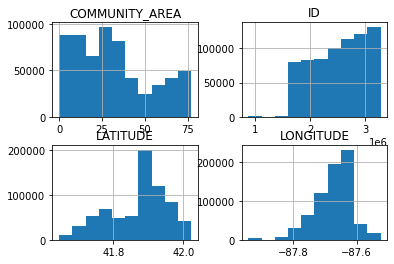

In [15]:
chicago_permits_df_sub.hist()

## Plotting a time series

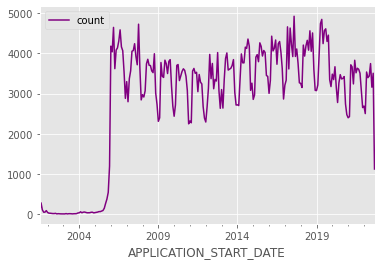

In [16]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data_df.plot(color="purple")

Notice how the number of applications in 2005 and before looks suspiciously low. My intuition is that this is a data problem. Let's remove all data from before 2006, since bad data will impact the accuracy of our model. Let's also remove data from before October of this year, since October is incomplete.

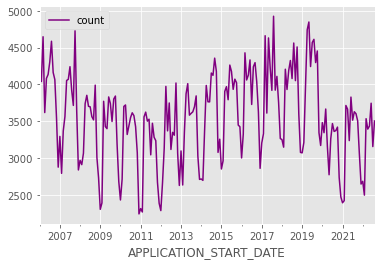

In [17]:
def is_between_2006_and_now(date):
    return date > datetime.datetime(2006, 1, 1) and date < datetime.datetime(2022, 9, 27)

data_df = data_df[data_df.index.to_series().apply(is_between_2006_and_now)]
data_df.plot(color="purple")

This plot makes two things pretty clear. First, there are some clear trends in the time series -- for example, an increase between 2011 and 2017, followed by a levelling off of permit applications. Second, there is a cyclic nature to the time series, which is indicative of there being seasonal variation in permit applications (which isn't surprising).

## Understanding long-term trends and seasonality
The types of modeling used on time series assume "stationarity". For a time series to be stationary, mean and variance should be constant over time (and of course, most real life time series will not be stationary). To satisfy this assumption, we need to remove trend and seasonality from our series. The underlying modeling code we will use will do this for us. Doing this ourselves explicitly enables us to make educated guesses about reasonable parameters for our model. We'll use the `seasonal_decompose` function to do this.

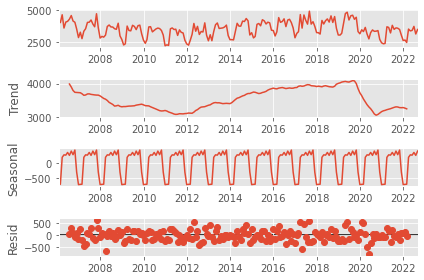

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_df)
fig = result.plot()

## Forecasting with Prophet
Next, we'll create a Prophet model. Doing so requires only that we rename our count column, and that we have a new column "ds" which is our timestamps. After training our model, we'll use it to predict a year into the future.

In [1]:
from prophet import Prophet
model = Prophet()
train_df = data_df.rename(columns={"count":'y'})
train_df["ds"] = train_df.index
model.fit(train_df)

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


NameError: name 'data_df' is not defined

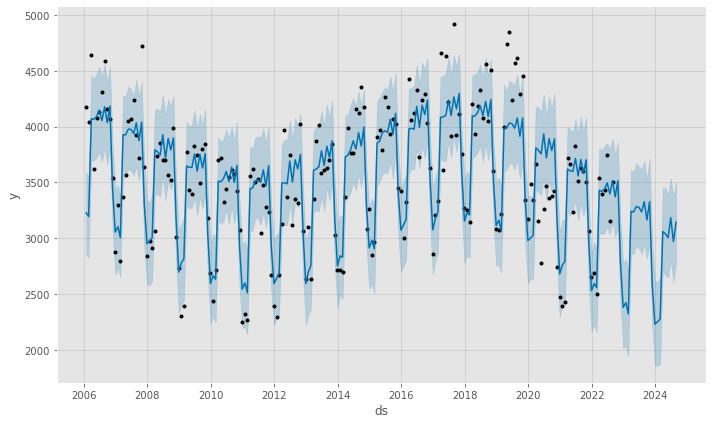

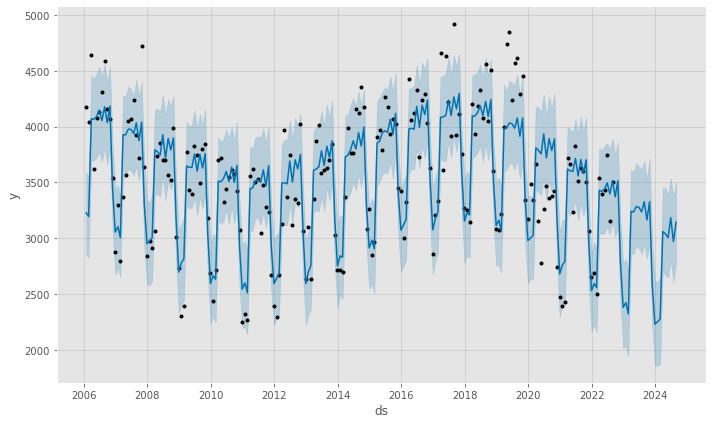

In [20]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(24, freq='M', include_history=True)
forecast = model.predict(future)
model.plot(forecast)

In [21]:
train_df

,y,ds
APPLICATION_START_DATE,,
2006-01-31,4181,2006-01-31
2006-02-28,4040,2006-02-28
2006-03-31,4647,2006-03-31
2006-04-30,3619,2006-04-30
2006-05-31,4082,2006-05-31
...,...,...
2022-04-30,3395,2022-04-30
2022-05-31,3436,2022-05-31
2022-06-30,3746,2022-06-30


In [22]:
train_df.size

400

Export the Chicago data portal "Sidewalk_Cafe_Permits.csv" from https://data.cityofchicago.org/Community-Economic-Development/Sidewalk-Cafe-Permits/nxj5-ix6z
Please also read the description about this dateset. 

In [ ]:
sidewalk_cafe_df = pd.read_csv("Sidewalk_Cafe_Permits_20231025.csv")
sidewalk_cafe_df_not_null = sidewalk_cafe_df.dropna()
sidewalk_cafe_df_not_null_reset_index = sidewalk_cafe_df_not_null.reset_index(drop=True)
sidewalk_cafe_date_df = sidewalk_cafe_df_not_null_reset_index[['ISSUED DATE']]

### Time series

In [ ]:
fixed_cafe_dates_df = sidewalk_cafe_date_df.copy()
fixed_cafe_dates_df["ISSUED DATE"] = fixed_cafe_dates_df["ISSUED DATE"].apply(pd.to_datetime)
fixed_cafe_dates_df = fixed_cafe_dates_df.set_index(fixed_cafe_dates_df["ISSUED DATE"])
grouped_cafe_dates = fixed_cafe_dates_df.resample("M").count()
data_cafe_df = pd.DataFrame({"count": grouped_cafe_dates.values.flatten()}, index=grouped_cafe_dates.index)
data_cafe_df.head(10)

,count
ISSUED DATE,
2001-03-31,56
2001-04-30,181
2001-05-31,142
2001-06-30,69
2001-07-31,17
2001-08-31,7
2001-09-30,4
2001-10-31,5
2001-11-30,1


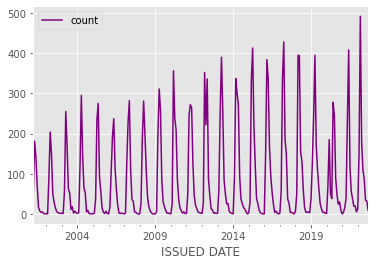

In [27]:
data_cafe_df.plot(color="purple")

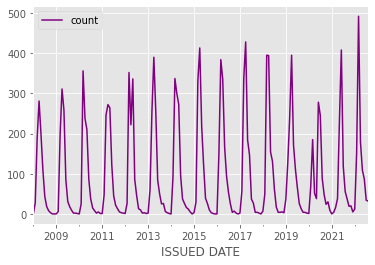

In [28]:
def is_between_2008_and_now(date):
    return date > datetime.datetime(2008, 1, 1) and date < datetime.datetime(2022, 9, 27)

data_cafe_df = data_cafe_df[data_cafe_df.index.to_series().apply(is_between_2008_and_now)]
data_cafe_df.plot(color="purple")

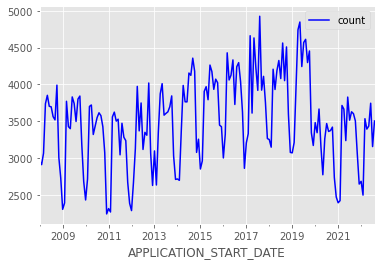

In [29]:
dataperm_df = data_df[data_df.index.to_series().apply(is_between_2008_and_now)]
dataperm_df.plot(color="blue")

## Simple linear regression

We will explore the relationship between building permits and sidewalk cafe permits, using simple linear regression.

In [30]:
perms, cafe = dataperm_df.to_numpy(), data_cafe_df.to_numpy()

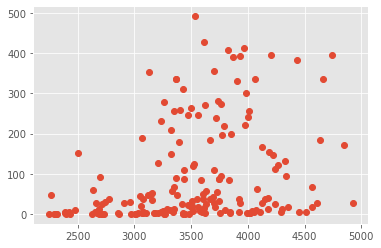

In [31]:
_ = plt.plot(perms,cafe,'o')

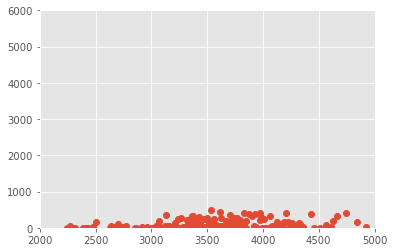

In [32]:
_ = plt.plot(perms,cafe,'o')
_ = plt.ylim([0,6000])
_ = plt.xlim([2000,5000])
plt.show()

In [33]:
import numpy as np
AA = np.vstack([perms.T, np.ones(len(perms))]).T
AA.shape

(176, 2)

In [34]:
m,c = np.linalg.lstsq(AA,cafe,rcond=None)[0]

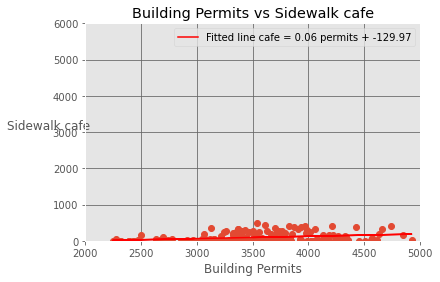

In [35]:
_ = plt.plot(perms,cafe,'o')
_ = plt.plot(perms,m*perms+c, 'r', label='Fitted line cafe = %.2f permits + %.2f' %(m,c))
_ = plt.legend()
_ = plt.xlabel('Building Permits')
_ = plt.ylabel('Sidewalk cafe', rotation='horizontal')
_ = plt.title('Building Permits vs Sidewalk cafe')
_ = plt.xlim([2000,5000])
_ = plt.ylim([0,6000])
_ = plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [36]:
# remove outlier and redo the regression:
cafe[cafe.argmax()]=cafe.mean()

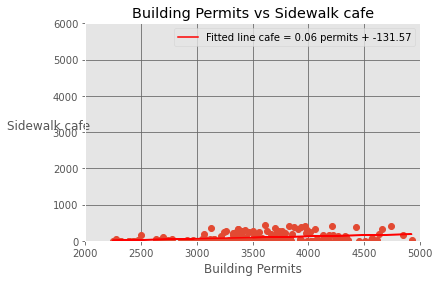

In [37]:
AA = np.vstack([perms.T, np.ones(len(perms))]).T
m,c = np.linalg.lstsq(AA,cafe,rcond=None)[0]
_ = plt.plot(perms,cafe,'o')
_ = plt.plot(perms,m*perms+c, 'r', label='Fitted line cafe = %.2f permits + %.2f' %(m,c))
_ = plt.legend()
_ = plt.xlabel('Building Permits')
_ = plt.ylabel('Sidewalk cafe', rotation='horizontal')
_ = plt.title('Building Permits vs Sidewalk cafe')
_ = plt.xlim([2000,5000])
_ = plt.ylim([0,6000])
_ = plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [ ]:
#TODO: Learn Polynomial regression with the tutoriols. https://www.w3schools.com/python/python_ml_polynomial_regression.asp
#https://medium.com/analytics-vidhya/polynomial-fitting-in-python-using-just-one-line-of-code-f1638a4b3678
#Polynomial regression on the Building Permits and Sidewalk cafe dataset.


# Milestone 2



### Q 1.1

Load your dataset and print the first 10 rows and any summary statistics that provide context about the data.

In [ ]:
Traffic_Crashes_Crashes_df = pd.read_csv(r'data/Traffic_Crashes_Crashes.csv')
Traffic_Crashes_People_df = pd.read_csv(r'data/Traffic_Crashes_People.csv')
Traffic_Crashes_Crashes=Traffic_Crashes_Crashes_df[['CRASH_RECORD_ID','CRASH_DATE','POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE','WEATHER_CONDITION','LIGHTING_CONDITION','LATITUDE','LONGITUDE']]
Traffic_Crashes_People=Traffic_Crashes_People_df[['CRASH_RECORD_ID','PERSON_ID','PERSON_TYPE','SEX','AGE','CELL_PHONE_USE','INJURY_CLASSIFICATION','DRIVER_ACTION','PEDPEDAL_ACTION']]
merged_df = pd.merge(Traffic_Crashes_People, Traffic_Crashes_Crashes, on='CRASH_RECORD_ID', how='inner') 
merged_df = merged_df.dropna(subset=['LATITUDE', 'LONGITUDE'])
print(len(merged_df))
print(merged_df.info())
merged_df.head(10)

C:\Users\jessi\AppData\Local\Temp\ipykernel_10752\2490526030.py:1: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  Traffic_Crashes_Crashes_df = pd.read_csv(r'Traffic_Crashes_Crashes.csv')
C:\Users\jessi\AppData\Local\Temp\ipykernel_10752\2490526030.py:2: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Traffic_Crashes_People_df = pd.read_csv(r'Traffic_Crashes_People.csv')


1930085
<class 'pandas.core.frame.DataFrame'>
Index: 1930085 entries, 0 to 1944032
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   CRASH_RECORD_ID         object 
 1   PERSON_ID               object 
 2   PERSON_TYPE             object 
 3   SEX                     object 
 4   AGE                     float64
 5   CELL_PHONE_USE          object 
 6   INJURY_CLASSIFICATION   object 
 7   DRIVER_ACTION           object 
 8   PEDPEDAL_ACTION         object 
 9   CRASH_DATE              object 
 10  POSTED_SPEED_LIMIT      int64  
 11  TRAFFIC_CONTROL_DEVICE  object 
 12  WEATHER_CONDITION       object 
 13  LIGHTING_CONDITION      object 
 14  LATITUDE                float64
 15  LONGITUDE               float64
dtypes: float64(3), int64(1), object(12)
memory usage: 250.3+ MB
None


,CRASH_RECORD_ID,PERSON_ID,PERSON_TYPE,SEX,AGE,CELL_PHONE_USE,INJURY_CLASSIFICATION,DRIVER_ACTION,PEDPEDAL_ACTION,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,LATITUDE,LONGITUDE
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,O749947,DRIVER,M,25.0,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,09/28/2019 03:30:00 AM,30,NO CONTROLS,RAIN,DARKNESS,41.900043,-87.755577
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,O871921,DRIVER,M,37.0,NaN,NO INDICATION OF INJURY,NONE,NaN,04/13/2020 10:50:00 PM,30,FLASHING CONTROL SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",41.736044,-87.653404
2,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,O10018,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,IMPROPER BACKING,NaN,11/01/2015 05:00:00 AM,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",41.808173,-87.708484
3,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,O10038,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 08:00:00 AM,35,NO CONTROLS,UNKNOWN,UNKNOWN,41.981425,-87.659861
4,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,O10039,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 10:15:00 AM,10,NO CONTROLS,CLEAR,DAYLIGHT,41.809489,-87.606417
5,dd1bce4bd6d0be4c247714dcabab44e6563c62b913229b...,O10041,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 11:00:00 AM,25,NO CONTROLS,CLEAR,UNKNOWN,41.733235,-87.654625
6,4bd2ee6bb306902b99a9c2ae55cf4fcffec00879e39759...,O10062,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 12:30:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.869592,-87.730334
7,9c03b6fcc6d72cf3ee2cb9ea754ea7e4617ab965142552...,O10066,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,10/31/2015 04:00:00 PM,15,NO CONTROLS,RAIN,DAWN,41.909765,-87.743376
8,2e7e0c1682100a200a46c25a532eda4febb00a2ae49ea9...,O1007,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,09/02/2015 02:35:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.896163,-87.640189
9,8bf8069b3d839b732fd35d2c9d8caddeddbb4b8978e84d...,O10088,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 01:00:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.985541,-87.700597


### Q 1.2


 Prepare the data for analysis by performing the necessary cleaning, transformation, and preprocessing steps.

In [21]:
upper_left_lat = 41.920704
upper_left_lon = -87.680469
lower_right_lat = 41.837562
lower_right_lon = -87.608829 

filtered_df = merged_df[merged_df['POSTED_SPEED_LIMIT'] < 40]
filtered_df['CRASH_DATE'] = pd.to_datetime(filtered_df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')
filtered_df = filtered_df[(filtered_df['CRASH_DATE'].dt.year == 2023) | (filtered_df['CRASH_DATE'].dt.year == 2024)]
filtered_df = filtered_df[
    (filtered_df['LATITUDE'] <= upper_left_lat) &  # Latitudes must be less than or equal to upper-left corner latitude
    (filtered_df['LATITUDE'] >= lower_right_lat) &  # Latitudes must be greater than or equal to lower-right corner latitude
    (filtered_df['LONGITUDE'] >= upper_left_lon) &  # Longitudes must be greater than or equal to upper-left corner longitude
    (filtered_df['LONGITUDE'] <= lower_right_lon)   # Longitudes must be less than or equal to lower-right corner longitude
]
filtered_df = filtered_df.drop_duplicates(subset='CRASH_RECORD_ID')
print(len(filtered_df))
filtered_df.head(10)

C:\Users\jessi\AppData\Local\Temp\ipykernel_10752\741151040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CRASH_DATE'] = pd.to_datetime(filtered_df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')


34413


,CRASH_RECORD_ID,PERSON_ID,PERSON_TYPE,SEX,AGE,CELL_PHONE_USE,INJURY_CLASSIFICATION,DRIVER_ACTION,PEDPEDAL_ACTION,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,LATITUDE,LONGITUDE
3871,9c76048a72db02252049e5406dfed02675916a536f1b87...,O1664970,DRIVER,M,47.0,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,2023-09-11 08:30:00,15,NO CONTROLS,CLEAR,DAYLIGHT,41.905132,-87.667689
3882,d3e1d7e50c437b1eece18eea166426815a53c82ad51d37...,O1560571,DRIVER,M,43.0,NaN,NO INDICATION OF INJURY,OTHER,NaN,2023-04-22 20:07:00,30,STOP SIGN/FLASHER,CLEAR,"DARKNESS, LIGHTED ROAD",41.895608,-87.625718
51886,f3f08d665d73e8a7c4a9677a2bfe9ac541e23b5e9c0f19...,P361133,PASSENGER,M,NaN,NaN,NO INDICATION OF INJURY,NaN,NaN,2023-08-04 13:13:00,15,NO CONTROLS,CLEAR,DAYLIGHT,41.866202,-87.660310
54186,18d2ca420e1a2698272bac8211caef62b54c242d45aa45...,O1873236,DRIVER,M,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,2024-06-16 01:00:00,30,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",41.896877,-87.621934
111061,69bba61b76c3ea72363a724b43d352a8a648df6604099d...,P380036,PASSENGER,F,21.0,NaN,NO INDICATION OF INJURY,NaN,NaN,2023-12-08 09:10:00,30,NO CONTROLS,CLEAR,DAYLIGHT,41.893366,-87.620128
126813,05d7150339d448a2ff362300b63b16e21728e1da5c1051...,P380122,PASSENGER,F,12.0,NaN,NO INDICATION OF INJURY,NaN,NaN,2023-12-08 17:10:00,20,STOP SIGN/FLASHER,CLEAR,"DARKNESS, LIGHTED ROAD",41.897781,-87.672377
128169,a62f9a2d45137842f7cc71743f008b18533610f682c27d...,P380127,PASSENGER,M,48.0,NaN,NO INDICATION OF INJURY,NaN,NaN,2023-12-08 14:16:00,30,NO CONTROLS,CLEAR,DAYLIGHT,41.879431,-87.668312
131284,0d28e9b4b8c5ada01ac2f530cf356620de09c8f46d592a...,P361137,PASSENGER,F,NaN,NaN,NO INDICATION OF INJURY,NaN,NaN,2023-08-04 14:30:00,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,41.876569,-87.652020
133792,a99c2b8906eb5505359b6b5f081d6307fae0ff3ed5b799...,P361142,PASSENGER,F,NaN,NaN,NO INDICATION OF INJURY,NaN,NaN,2023-08-04 14:03:00,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,41.865058,-87.671153
136399,8d57daacadd9f56574358e4aad12bed80bf03f3c103eb8...,P361150,PASSENGER,M,38.0,NaN,NO INDICATION OF INJURY,NaN,NaN,2023-08-04 13:00:00,30,NO CONTROLS,CLEAR,DAYLIGHT,41.857786,-87.660043


### Q2.1


Submit at least two examples where you apply analytical techniques, such as regression, clustering, or machine learning algorithms to your datasets. 

### Q2.2

 For each example, describe how you applied the analytical method (e.g., regression, clustering, machine learning) to your dataset. Explain any data cleaning, feature selection, or transformation processes you used. How did you ensure that the method was applied correctly and that the results were reliable? 


### Q2.3

Identify any patterns or insights you discovered through the analysis. Explain how these findings contribute to understanding the research challenge.

### Q 2.4

What are some challenges you encountered during the process and how did you address them. 

### Q 3


Based on the insights derived from the analysis, what potential areas for improvement did your analysis reveal and what specific actions would you suggest to address these issues? How can the findings from your analysis be used to develop strategies to improve the current situation.

